**Box Office Revenue Prediction Using Linear Regression in Machine Learning**

Box Office Revenue Prediction Using Linear Regression in Machine Learning
Introduction
This project tackles the problem of predicting box office revenue for movies using linear regression in machine learning. Predicting a movie's revenue is a crucial task for movie production companies and investors, as it helps in making informed decisions about investments and marketing strategies.

Project Overview

Objective

The primary objective of this project is to predict the box office revenue of movies based on various features and attributes associated with them. It's a regression problem, and we employ common prediction models, including Linear Regression and Decision Tree Regression, to achieve this goal.

Key Steps
The project involves the following key steps:

Data Collection: Gathering a dataset that contains relevant information

*   List item
*   List item

about movies, such as budget, genre, cast, release date, and more. This data will serve as the foundation for our prediction model.

1)Data Preprocessing: Cleaning and preparing the dataset for model training. This includes handling missing data, encoding categorical variables, and feature scaling.


2)Feature Engineering: Selecting and engineering meaningful features that can significantly impact box office revenue prediction. This step may involve data transformation and feature selection techniques.

3)Model Selection: Choosing appropriate machine learning regression models for the prediction task. In this project, we utilize Linear Regression and Decision Tree Regression, among others.

4)Model Training: Training the selected models using the preprocessed dataset. This step involves splitting the data into training and testing sets, fitting the models, and tuning hyperparameters.

5)Model Evaluation: Assessing the performance of the trained models using relevant evaluation metrics. We aim to build a model that provides accurate revenue predictions.

6)Prediction and Visualization: Using the trained model to make revenue predictions for new or unseen movies. Visualizing the results can help in understanding the model's predictions better.



Conclusion :
By completing this project, we aim to develop a reliable machine learning model for predicting box office revenue. Accurate revenue predictions are essential for movie production companies and investors to make informed decisions about their investments, marketing strategies, and overall success.

Feel free to contribute to this project, experiment with different regression models, and enhance the accuracy of revenue predictions. Together, we can improve the accuracy of box office revenue forecasts in the movie industry.

Happy modeling!

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import yaml
import ast
from tqdm import tqdm
from datetime import datetime
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import json

In [4]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [5]:
train.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
train.iloc[767]["tagline"]

'Come and Get Some!'

In [7]:
miss = train.isnull().sum()
miss= miss[miss > 0]
miss.sort_values(inplace=True)
miss

poster_path                 1
runtime                     2
genres                      7
overview                    8
cast                       13
crew                       16
spoken_languages           20
production_countries       55
production_companies      156
Keywords                  276
tagline                   597
homepage                 2054
belongs_to_collection    2396
dtype: int64

In [8]:
# get lengths of text columns
columns = ['original_title', 'title', 'overview', 'tagline']
for col in columns:
    new_col = col + '_len'
    train[new_col] = train[col].apply(lambda x: 0 if x is np.nan else len(x))
    test[new_col] = test[col].apply(lambda x: 0 if x is np.nan else len(x))

# drop ID/URL/text columns
columns.extend(['homepage', 'imdb_id', 'poster_path', 'belongs_to_collection'])

train.drop(columns, axis=1, inplace=True)
test.drop(columns, axis=1, inplace=True)

In [9]:
#Alternate way to drop features using for loop
# train = train[[i for i in train.columns if i not in ["id", "belongs_to_collection", "overview", "poster_path","homepage", "title","original_title","Keywords"]]]
# test = test[[i for i in test.columns if i not in ["id", "belongs_to_collection", "overview", "poster_path", "tagline","homepage", "title","original_title","Keywords"]]]

In [10]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 3000 rows and 19 columns
The test data has 4398 rows and 18 columns


<ipython-input-11-929d1b8230ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["revenue"])


<Axes: xlabel='revenue', ylabel='Density'>

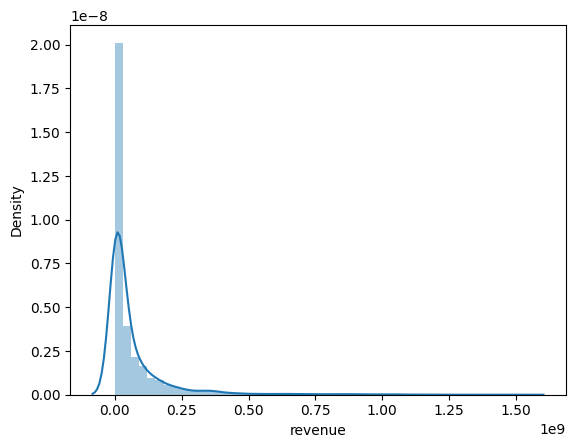

In [11]:
#Creating Distribution Plot
sns.distplot(train["revenue"])

The skewness of target is 0.005468456321668449


<ipython-input-12-037b16cee193>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<Axes: xlabel='revenue', ylabel='Density'>

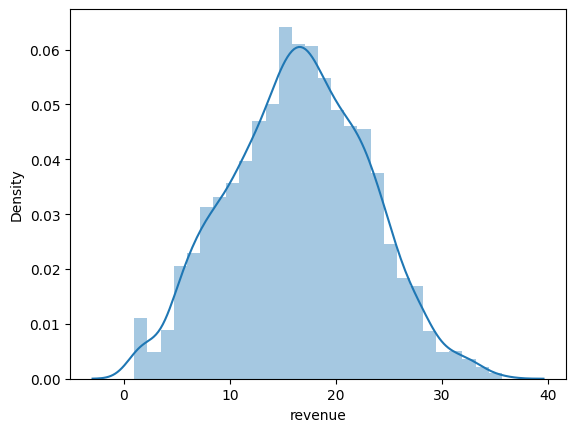

In [12]:
#Determining Skewness
target= np.power(train['revenue'], 0.169)
print ("The skewness of target is {}".format(target.skew()))
sns.distplot(target)


In [13]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print("There are {} numeric features and {} categorical features".format(numeric_data.shape[1], cat_data.shape[1]))

There are 9 numeric features and 10 categorical features


In [14]:
train.status = train.status.fillna("released")
test.status = test.status.fillna("released")

<Axes: >

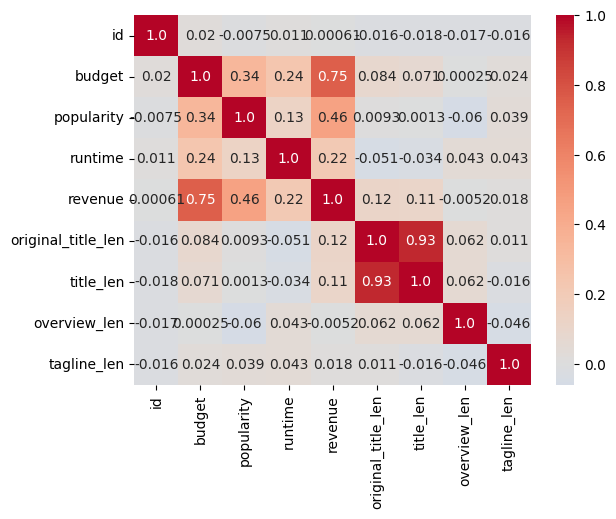

In [15]:
corr= numeric_data.corr()
sns.heatmap(corr, annot=True, fmt='.2', center=0.0, cmap='coolwarm')

In [16]:
print (corr['revenue'].sort_values(ascending=False)[:], '\n')

revenue               1.000000
budget                0.752965
popularity            0.461460
runtime               0.216380
original_title_len    0.117582
title_len             0.109664
tagline_len           0.018118
id                    0.000610
overview_len         -0.005188
Name: revenue, dtype: float64 



In [17]:
cat_data.describe()

,genres,original_language,production_companies,production_countries,release_date,spoken_languages,status,Keywords,cast,crew
count,2993,3000,2844,2945,3000,2980,3000,2724,2987,2984
unique,872,36,2383,321,2398,401,2,2648,2975,2984
top,"[{'id': 18, 'name': 'Drama'}]",en,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
freq,266,2575,51,1752,5,1817,2996,27,13,1


In [18]:
print(train[["original_language", "revenue"]].groupby(['original_language'], as_index=False).mean().sort_values(by='revenue', ascending=False))

   original_language       revenue
7                 en  7.466591e+07
35                zh  7.037637e+07
32                tr  5.166341e+07
17                ja  3.065180e+07
2                 cn  2.977289e+07
13                hi  2.534637e+07
5                 de  2.053090e+07
11                fr  1.713257e+07
16                it  1.641513e+07
24                pl  1.501083e+07
30                ta  1.470625e+07
18                ko  1.377670e+07
4                 da  1.175709e+07
29                sv  1.163051e+07
12                he  1.112585e+07
25                pt  1.087902e+07
8                 es  8.564790e+06
31                te  8.320425e+06
6                 el  8.000000e+06
27                ru  6.929453e+06
20                mr  4.400000e+06
21                nb  4.159678e+06
15                id  2.627209e+06
22                nl  1.959667e+06
10                fi  1.471932e+06
0                 ar  1.347747e+06
19                ml  1.315000e+06
23                no

In [19]:
sp_pivot= train.pivot_table(index='original_language', values='revenue', aggfunc=np.mean).sort_values(by= 'revenue', ascending=False)
sp_pivot

,revenue
original_language,
en,7.466591e+07
zh,7.037637e+07
tr,5.166341e+07
ja,3.065180e+07
cn,2.977289e+07
hi,2.534637e+07
de,2.053090e+07
fr,1.713257e+07
it,1.641513e+07


<Axes: xlabel='original_language'>

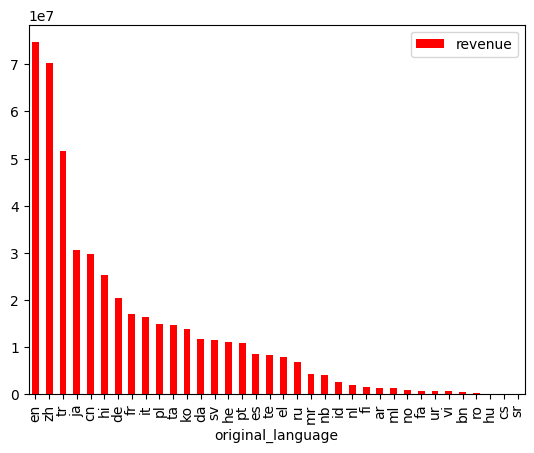

In [20]:
sp_pivot.plot(kind='bar', color='red')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

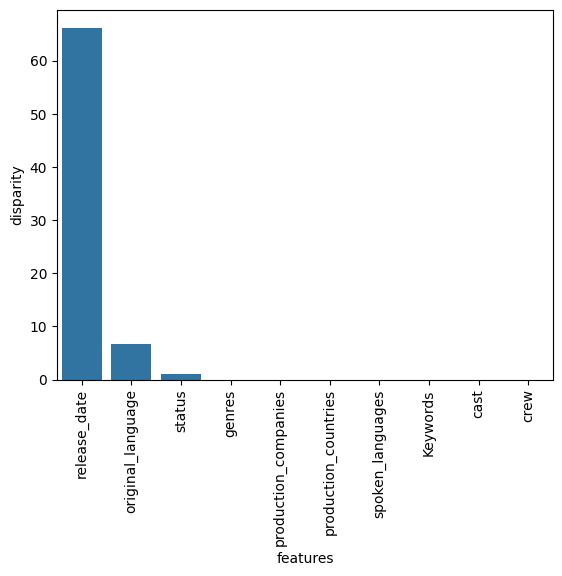

In [21]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['revenue'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['revenue'] = train.revenue.values
k = anova(cat_data)
k['disparity'] = np.log(1./k['pval'].values)
sns.barplot(data=k, x = 'features', y='disparity')
plt.xticks(rotation=90)
plt

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

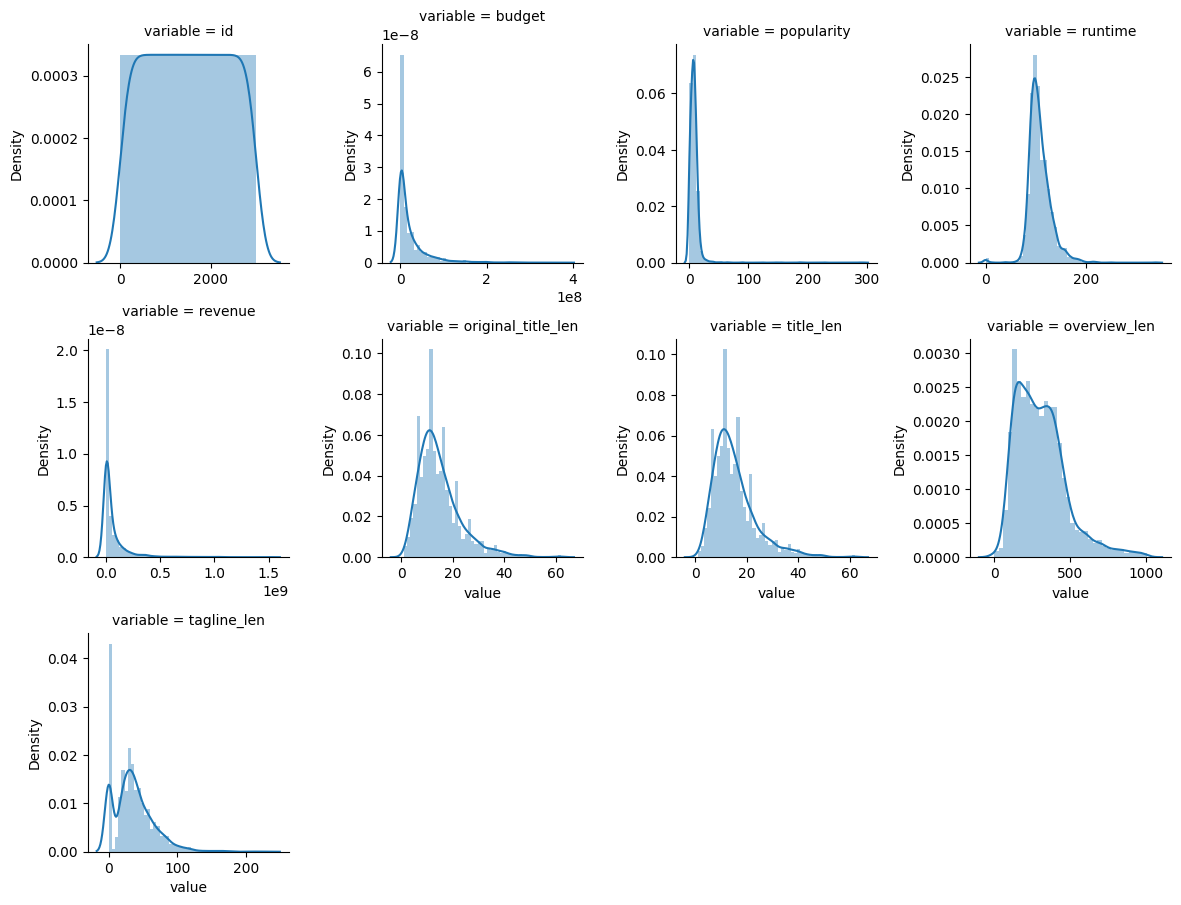

In [22]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

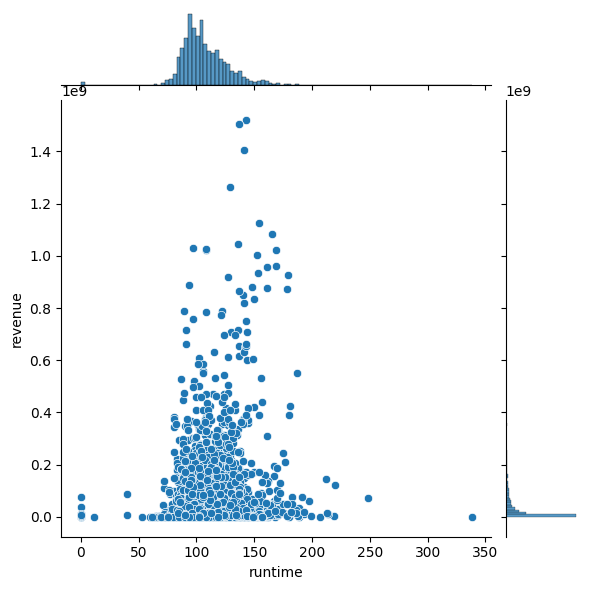

In [23]:
#Creating Jointplot
sns.jointplot(x=train['runtime'], y=train['revenue'])

In [24]:
d1=dict.fromkeys(set(train["original_language"].values),0 )
for i in train["original_language"].values:
    d1[i]+=1

In [25]:
train.loc[train.release_date.isnull(), 'release_date'] = train.release_date.mode()[0]
test.loc[test.release_date.isnull(), 'release_date'] = test.release_date.mode()[0]

In [26]:
train["runtime"].fillna(train["runtime"].mean, inplace=True)
test["runtime"].fillna(test["runtime"].mean, inplace=True)

train["spoken_languages"].fillna("en", inplace=True)
test["spoken_languages"].fillna("en", inplace=True)

train = train.drop(["Keywords"], axis = 1)
test = test.drop(["Keywords"], axis = 1)

In [27]:
def expand_release_date(df):
    df.release_date = pd.to_datetime(df.release_date)

    df['release_year'] = df.release_date.dt.year
    df['release_year'] = df.release_year.apply(lambda x: x-100 if x > 2020 else x)

    df['release_month'] = df.release_date.dt.month
    df['release_day'] = df.release_date.dt.dayofweek
    df['release_quarter'] = df.release_date.dt.quarter

    return df

train = expand_release_date(train)
test = expand_release_date(test)

<ipython-input-27-d053a87839a3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.release_date = pd.to_datetime(df.release_date)
<ipython-input-27-d053a87839a3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.release_date = pd.to_datetime(df.release_date)


In [28]:
train["genres"].fillna("[{'id': 18, 'name': 'Drama'}]", inplace=True)
test["genres"].fillna("[{'id': 18, 'name': 'Drama'}]", inplace=True)
train["production_countries"].fillna("[{'iso_3166_1': 'US', 'name': 'United States of America'}]"
, inplace=True)
test["production_countries"].fillna("[{'iso_3166_1': 'US', 'name': 'United States of America'}]"
, inplace=True)
train["production_companies"].fillna("[{'name': 'Paramount Pictures', 'id': 4}]"
, inplace=True)
test["production_companies"].fillna("[{'name': 'Paramount Pictures', 'id': 4}]"
, inplace=True)

In [29]:
print('Number of genres in films')
train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of genres in films


genres
29     273
30     236
59     192
63     190
93     172
      ... 
138      1
230      1
188      1
185      1
168      1
Name: count, Length: 101, dtype: int64

In [30]:
def conj(j):
    return [i["id"] for i in eval(j)]
train["genres"]=train["genres"].apply(lambda l: conj(l))
test["genres"]=test["genres"].apply(lambda l: conj(l))

In [31]:
def conj(j):
    return [i["name"] for i in eval(j)]
train["production_companies"]=train["production_companies"].apply(lambda l: conj(l))
test["production_companies"]=test["production_companies"].apply(lambda l: conj(l))

In [32]:
def conj(j):
    if pd.isnull(j):
        return np.nan
    return [i["name"] for i in eval(str(j))]
train["cast"]=train["cast"].apply(lambda l: conj(l))
test["cast"]=test["cast"].apply(lambda l: conj(l))

In [33]:
def conj(j):
    if pd.isnull(j):
        return np.nan
    return [i["name"] for i in eval(str(j))]
train["crew"]=train["crew"].apply(lambda l: conj(l))
test["crew"]=test["crew"].apply(lambda l: conj(l))

In [34]:
from collections import Counter
list1= list()
for i in train.dropna().cast:
    if i:
        list1.extend(i)

In [35]:
from collections import Counter
tlist1= list()
for i in test.dropna().cast:
    if i:
        tlist1.extend(i)

In [36]:
# q = Counter([i[1]for i in Counter(list1).most_common()]).most_common()

In [37]:
train=train.dropna(axis=0)
train.cast = train.cast.apply(lambda y: np.nan if len(y)==0 else y)

<ipython-input-37-dade78add2c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.cast = train.cast.apply(lambda y: np.nan if len(y)==0 else y)


In [38]:
test=test.dropna(axis=0)
test.cast = test.cast.apply(lambda y: np.nan if len(y)==0 else y)

<ipython-input-38-4faa6b988909>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.cast = test.cast.apply(lambda y: np.nan if len(y)==0 else y)


In [39]:
train=train.dropna(axis=0)
test=test.dropna(axis=0)

In [40]:
list2=[]
for i,j in zip(train["revenue"],train["cast"]):
    for k in range(len(j)):
        list2.append(i)

In [41]:
# tyu=[len(i) for i in train["cast"]]
# tyu.index(0)

In [42]:
app_count = dict(Counter(list1))
list3=list(app_count.values())
rate=dict([(k,i/j) for i,j,k in zip(list2,list3,app_count.keys())])
def sume(l):
    sum1=0
    for i in l:
        sum1+=rate[i]
    return sum1/len(l)
train["cast_rev"]=train["cast"].apply(lambda l : sume(l))

In [43]:
col= [ "id","original_language", "spoken_languages", "title_len", "runtime"]
for i in col:
    train.drop(i, axis=1, inplace=True)

In [44]:
col= [ "id","original_language", "spoken_languages", "title_len", "runtime"]
for i in col:
    test.drop(i, axis=1, inplace=True)

In [45]:
# lo=list(set(np.hstack(train['production_companies'])))
# enco=[]
# for i in train["production_companies"]:
#     if type(i)== list:
#         en=np.zeros((len(lo),),dtype="int")
#         for j in i:
#             en[lo.index(j)]=1
#         enco.append(list(en))
#     else :
#         enco.append(i)

train["cast_rev"]/=min(train["cast_rev"])
# test["cast_rev"]/=min(test["cast_rev"])

In [46]:
train["cast"]

0       [Rob Corddry, Craig Robinson, Clark Duke, Adam...
1       [Anne Hathaway, Julie Andrews, H√©ctor Elizond...
2       [Miles Teller, J.K. Simmons, Melissa Benoist, ...
3       [Vidya Balan, Nawazuddin Siddiqui, Parambrata ...
4       [Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...
                              ...                        
2995    [Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...
2996    [Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...
2997    [Geena Davis, Samuel L. Jackson, Yvonne Zima, ...
2998    [Ben Stiller, Jennifer Aniston, Philip Seymour...
2999    [Taylor Lautner, Lily Collins, Alfred Molina, ...
Name: cast, Length: 2972, dtype: object

In [47]:
train["cast_no"]=train["cast"].apply(lambda l: np.max([app_count[i] for i in l]))

In [48]:
test["cast"]

0       [Craig Blair, Emily Bauer, Sarah Natochenny, I...
1       [Allison Hayes, William Hudson, Yvette Vickers...
2       [Meg Ryan, Matthew Broderick, Kelly Preston, T...
3       [Lubna Azabal, M√©lissa D√©sormeaux-Poulin, Ma...
4       [Dennis Hopper, Peter Bart, Warren Beatty, Car...
                              ...                        
4393    [Angelina Jolie, Antonio Banderas, Gregory Itz...
4394    [Seth Green, Matthew Lillard, Dax Shepard, Ant...
4395    [Paul Newman, Charlotte Rampling, Jack Warden,...
4396    [Maika Monroe, Keir Gilchrist, Daniel Zovatto,...
4397    [Anna Karina, Sady Rebbot, Andr√© S. Labarthe,...
Name: cast, Length: 4360, dtype: object

In [49]:
# test["cast_no"]=test["cast"].apply(lambda l: np.max([app_count[i] for i in l]))

In [50]:
train=train.drop("cast",axis=1)
test=test.drop("cast",axis=1)

In [51]:
#This feature came out to be of less significance, therefore no need for doin this
# lo1=list(set(np.hstack(train['genres'])))
# enco1=[]
# for i in train["genres"]:
#     if type(i)== list:
#         en=np.zeros((len(lo1),),dtype="int")
#         for j in i:
#             en[lo1.index(j)]=1
#         enco1.append(list(en))
#     else :
#         print(type(i))
#         enco1.append(i)

In [52]:
# train[["g"+str(i) for i in range(20)]]=pd.DataFrame(enco1,index=train.index)

In [53]:
train.drop("crew",axis=1,inplace=True)
test.drop("crew",axis=1,inplace=True)

In [54]:
train.drop("production_countries",axis=1,inplace=True)
test.drop("production_countries",axis=1,inplace=True)

In [55]:
train.drop(["genres","release_date"],axis=1,inplace=True)
test.drop(["genres","release_date"],axis=1,inplace=True)

In [56]:
from collections import Counter
list1= list()
for i in train.dropna().production_companies:
    if i:
        list1.extend(i)
train.production_companies = train.production_companies.apply(lambda y: np.nan if len(y)==0 else y)
train=train.dropna(axis=0)

In [57]:
from collections import Counter
tlist1= list()
for i in test.dropna().production_companies:
    if i:
        tlist1.extend(i)
test.production_companies = test.production_companies.apply(lambda y: np.nan if len(y)==0 else y)
test=test.dropna(axis=0)

In [58]:
app_count = dict(Counter(list1))

In [59]:
train["production_no"]=train["production_companies"].apply(lambda l: np.max([app_count[i] for i in l]))
# test["production_no"]=test["production_companies"].apply(lambda l: np.max([app_count[i] for i in l]))

In [60]:
train.drop("production_companies",axis=1,inplace=True)
test.drop("production_companies",axis=1,inplace=True)

In [61]:
ct = OneHotEncoder()
train["status"]=ct.fit_transform([train["status"]]).toarray()[0]
test["status"]=ct.fit_transform([test["status"]]).toarray()[0]

In [62]:
train.drop("status",axis=1,inplace=True)
test.drop("status",axis=1,inplace=True)

In [63]:
sc = StandardScaler()
scaled = sc.fit_transform(train.values)
df1=pd.DataFrame(scaled)
X = df1[[i for i in df1.columns if i != 2]].values
y = df1[2].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [65]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [66]:
y_pred1= regressor.predict(X_test)

In [67]:
def rmse(pred, actual):
    return np.sqrt(((pred-actual)**2).mean())

In [68]:
print("%.20f"%rmse(y_pred1, y_test))

0.67814707687469300001


In [69]:
from sklearn.metrics import r2_score
print("%.10f"%r2_score(y_test, y_pred1))

0.6092399599


In [70]:
from sklearn.ensemble import RandomForestRegressor
regressor2= RandomForestRegressor(n_estimators= 400)
regressor2.fit(X_train, y_train)


RandomForestRegressor(n_estimators=400)

In [71]:
y_pred2= regressor2.predict(X_test)

In [72]:
r2_score(y_test, y_pred2)

0.6052107188503486

In [73]:
rmse(y_pred2, y_test)

0.6816343966754231